In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162726 sha256=70cd411f8536c97c2c7821171ab1c646f226ae8d04dacdeb015a604683f08a56
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
import pandas as pd
import numpy as np
# from surprise import Reader, Dataset, SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, CoClustering, BaselineOnly
from surprise import *
from surprise.model_selection.validation import cross_validate

Import data

In [6]:
df = pd.read_csv("/content/Products_ThoiTrangNam_raw.csv")
df.head()

,product_id,product_name,category,sub_category,link,image,price,rating,description
0,190,"Áo ba lỗ thun gân ,form body tôn dáng",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-ba-l%E1%BB%97-thun-g...,https://cf.shopee.vn/file/2c1ca03f5dc42f316fdf...,86250.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
1,191,"Áo Ba Lỗ Nam Trắng Chất Cotton Siêu Mát, Siêu Đẹp",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Tr...,https://cf.shopee.vn/file/c7ea4c6574dc79be6b26...,26800.0,4.9,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nXu...
2,192,"Áo Ba Lỗ Nam Tyasuo chất vải co dãn mát, không...",Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Ba-L%E1%BB%97-Nam-Ty...,https://cf.shopee.vn/file/6f93bcda10efe374f8cc...,39500.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nTh...
3,193,ÁO BA LỖ HÀNG VIỆT NAM 100% COTTON,Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81O-BA-L%E1%BB%96-H%C3%8...,https://cf.shopee.vn/file/1d7ed5e34bff8bc8b49a...,16500.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...
4,194,Áo Thun Nam Thể Thao Ba Lỗ Mẫu Mới Siêu Đẹp (B...,Thời Trang Nam,Áo Ba Lỗ,https://shopee.vn/%C3%81o-Thun-Nam-Th%E1%BB%83...,NaN,45000.0,4.8,Danh Mục\nShopee\nThời Trang Nam\nÁo Ba Lỗ\nCh...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49663 entries, 0 to 49662
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    49663 non-null  int64  
 1   product_name  49663 non-null  object 
 2   category      49663 non-null  object 
 3   sub_category  49663 non-null  object 
 4   link          49663 non-null  object 
 5   image         36443 non-null  object 
 6   price         49663 non-null  float64
 7   rating        49663 non-null  float64
 8   description   48700 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.4+ MB


In [8]:
df=df.drop("user",axis=1)
df.head()

KeyError: "['user'] not found in axis"

In [9]:
n_ratings = len(df)
n_products = len(df['product_id'].unique())
n_users = len(df['user_id'].unique())

KeyError: 'user_id'

In [ ]:
display(n_ratings, n_products, n_users)

1024482

31267

650636

In [ ]:
df['product_id'].value_counts()

1731      412
177       395
231       391
17194     389
2359      387
         ... 
121331      1
121330      1
121328      1
121326      1
26899       1
Name: product_id, Length: 31267, dtype: int64

Reprocessing data

In [ ]:
df.isnull().sum()

product_id    0
user_id       0
rating        0
dtype: int64

In [ ]:
duplicate_rows = df[df.duplicated()]

In [ ]:
duplicate_rows

,product_id,user_id,rating
29,190,6,5
173,190,165,1
204,191,200,5
211,191,199,5
230,191,217,5
...,...,...,...
1023410,171089,199,5
1023491,171092,649999,5
1023493,171092,61089,5
1023497,171092,650003,5


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999815 entries, 0 to 1024481
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   product_id  999815 non-null  int64
 1   user_id     999815 non-null  int64
 2   rating      999815 non-null  int64
dtypes: int64(3)
memory usage: 30.5 MB


Lưu data đã tiền xử lý

In [ ]:
df.to_csv('data_userbased.csv')

EDA dữ liệu

In [ ]:
import pydantic
from ydata_profiling import ProfileReport

profile=ProfileReport(df,title="EDA rating thoi trang nam")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Build model for userbased

In [ ]:
# https://surprise.readthedocs.io/en/stable/reader.html
reader = Reader()
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

In [ ]:
# https://www.youtube.com/watch?v=8wLKuscyO9I
# Singular value decomposition
# algorithm = SVD()
algorithm = KNNBasic()
# Run 5-fold cross-validation and print results
results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Computing the msd similarity matrix...


MemoryError: Unable to allocate 950. GiB for an array with shape (357094, 357094) and data type float64

Chia data để xây dựng recommender system

Thuật toán KNNBasic

Cách 1:

In [ ]:
import pandas as pd
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

# Define chunk size
chunk_size = 10000

# Create a Reader object to parse the ratings in the dataset
reader = Reader(rating_scale=(1, 5))

# Function to process results
def process_results(results):
    # You can perform any processing or aggregation here
    # For example, you might want to aggregate RMSE and MAE scores
    aggregated_results = {
        'mean_RMSE': sum(results['test_rmse']) / len(results['test_rmse']),
        'mean_MAE': sum(results['test_mae']) / len(results['test_mae'])
    }
    return aggregated_results

# Function to write processed data to disk or database
def write_to_disk(data):
    # Write data to disk or database
    pass  # Placeholder for actual implementation

# Read data in chunks
for chunk in pd.read_csv('data_userbased.csv', chunksize=chunk_size):
    # Convert the chunk into a Surprise Dataset
    data = Dataset.load_from_df(chunk[['user_id', 'product_id', 'rating']], reader)

    # Define and train your algorithm
    algorithm = KNNBasic()

    # Run 5-fold cross-validation and print results
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

    # Process results
    processed_results = process_results(results)

    # Write processed data to disk or database
    write_to_disk(processed_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9897  0.9377  0.9970  0.9481  0.9981  0.9741  0.0259  
MAE (testset)     0.6880  0.6633  0.6952  0.6697  0.6853  0.6803  0.0119  
Fit time          0.86    1.73    0.82    0.77    0.83    1.00    0.37    
Test time         0.06    0.08    0.05    0.04    0.03    0.05    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [ ]:
processed_results

{'mean_RMSE': 0.682590686699221, 'mean_MAE': 0.3385870634331378}

In [ ]:
# Print RMSE and MAE for each fold
print("RMSE for each fold:", results['test_rmse'])
print("MAE for each fold:", results['test_mae'])

RMSE for each fold: [0.72724778 0.65972458 0.64670994 0.66864252 0.71062861]
MAE for each fold: [0.34747514 0.33927477 0.33144893 0.33144267 0.34329381]


Cách 2

In [ ]:
import pandas as pd
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import KFold, cross_validate
from surprise import accuracy

# Define chunk size
chunk_size = 10000

# Create a Reader object to parse the ratings in the dataset
reader = Reader(rating_scale=(1, 5))

# Read the entire dataset in chunks
chunks = []
for chunk in pd.read_csv('data_userbased.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Initialize lists to store RMSE and MAE for each fold
rmse_list = []
mae_list = []

# Define and train your algorithm
algorithm = KNNBasic()

# Perform cross-validation on chunks
for i, chunk in enumerate(chunks):
    # Load the dataset from the current chunk
    data = Dataset.load_from_df(chunk[['user_id', 'product_id', 'rating']], reader)

    # Define a KFold object with the desired number of splits
    kf = KFold(n_splits=5, random_state=42)

    # Perform cross-validation on the entire dataset
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=kf, verbose=True)

    # Calculate and print RMSE and MAE for each fold in the entire dataset
    fold_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
    fold_mae = sum(results['test_mae']) / len(results['test_mae'])
    print(f"Chunk {i + 1} RMSE:", fold_rmse)
    print(f"Chunk {i + 1} MAE:", fold_mae)

    # Append RMSE and MAE to the lists
    rmse_list.append(fold_rmse)
    mae_list.append(fold_mae)

# Print RMSE and MAE for each chunk
print("RMSE for each chunk:", rmse_list)
print("MAE for each chunk:", mae_list)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9451  1.0066  1.0098  0.9490  0.9824  0.9786  0.0275  
MAE (testset)     0.6642  0.6921  0.6989  0.6687  0.6828  0.6813  0.0132  
Fit time          0.94    1.04    0.72    0.71    0.71    0.83    0.14    
Test time         0.04    0.06    0.04    0.04    0.03    0.04    0.01    
Chunk 1 RMSE: 0.9785663737138117
Chunk 1 MAE: 0.6813339831005629
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarit

In [ ]:
# Print RMSE and MAE for each fold in the entire dataset
print("RMSE for each fold:", results['test_rmse'])
print("MAE for each fold:", results['test_mae'])

RMSE for each fold: [0.67572983 0.69233642 0.64616943 0.68837609 0.71124803]
MAE for each fold: [0.33729524 0.33544451 0.32947976 0.34563077 0.34902047]


Cách 2 có thể thấy được kết quả đến từ từng chunk được tích lũy đến chunk cuối cùng, chọn cách 2

Thuật toán SVD

In [ ]:
import pandas as pd
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import KFold, cross_validate
from surprise import accuracy

# Define chunk size
chunk_size = 10000

# Create a Reader object to parse the ratings in the dataset
reader = Reader(rating_scale=(1, 5))

# Read the entire dataset in chunks
chunks = []
for chunk in pd.read_csv('data_userbased.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Initialize lists to store RMSE and MAE for each fold
rmse_list = []
mae_list = []

# Define and train your algorithm
algorithm = SVD()

# Perform cross-validation on chunks
for i, chunk in enumerate(chunks):
    # Load the dataset from the current chunk
    data = Dataset.load_from_df(chunk[['user_id', 'product_id', 'rating']], reader)

    # Define a KFold object with the desired number of splits
    kf = KFold(n_splits=5, random_state=42)

    # Perform cross-validation on the entire dataset
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=kf, verbose=True)

    # Calculate and print RMSE and MAE for each fold in the entire dataset
    fold_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
    fold_mae = sum(results['test_mae']) / len(results['test_mae'])
    print(f"Chunk {i + 1} RMSE:", fold_rmse)
    print(f"Chunk {i + 1} MAE:", fold_mae)

    # Append RMSE and MAE to the lists
    rmse_list.append(fold_rmse)
    mae_list.append(fold_mae)

# Print RMSE and MAE for each chunk
print("RMSE for each chunk:", rmse_list)
print("MAE for each chunk:", mae_list)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8350  0.8738  0.8733  0.8365  0.8600  0.8557  0.0170  
MAE (testset)     0.5332  0.5568  0.5479  0.5378  0.5422  0.5436  0.0082  
Fit time          0.24    0.19    0.22    0.19    0.17    0.20    0.02    
Test time         0.02    0.01    0.01    0.01    0.01    0.02    0.00    
Chunk 1 RMSE: 0.855686049129436
Chunk 1 MAE: 0.5435687182152878
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1821  1.1740  1.1740  1.1858  1.1588  1.1749  0.0093  
MAE (testset)     0.9511  0.9375  0.9424  0.9457  0.9373  0.9428  0.0052  
Fit time          0.16    0.21    0.19    0.23    0.23    0.20    0.03    
Test time         0.01    0.01    0.01    0.02    0.02    0.02    0.00    
Chunk 2 RMSE: 1.1749336707860873
Chunk 2 MAE: 0.9428036349891029
Evaluating RM

In [ ]:
# Print RMSE and MAE for each fold in the entire dataset
print("RMSE for each fold:", results['test_rmse'])
print("MAE for each fold:", results['test_mae'])

RMSE for each fold: [0.63850184 0.6650557  0.62313821 0.64275959 0.67795419]
MAE for each fold: [0.30932874 0.31306459 0.30713881 0.31622102 0.32942247]


Thuật toán CoClustering

In [ ]:
import pandas as pd
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import KFold, cross_validate
from surprise import accuracy

# Define chunk size
chunk_size = 10000

# Create a Reader object to parse the ratings in the dataset
reader = Reader(rating_scale=(1, 5))

# Read the entire dataset in chunks
chunks = []
for chunk in pd.read_csv('data_userbased.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Initialize lists to store RMSE and MAE for each fold
rmse_list = []
mae_list = []

# Define and train your algorithm
algorithm = CoClustering()

# Perform cross-validation on chunks
for i, chunk in enumerate(chunks):
    # Load the dataset from the current chunk
    data = Dataset.load_from_df(chunk[['user_id', 'product_id', 'rating']], reader)

    # Define a KFold object with the desired number of splits
    kf = KFold(n_splits=5, random_state=42)

    # Perform cross-validation on the entire dataset
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=kf, verbose=True)

    # Calculate and print RMSE and MAE for each fold in the entire dataset
    fold_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
    fold_mae = sum(results['test_mae']) / len(results['test_mae'])
    print(f"Chunk {i + 1} RMSE:", fold_rmse)
    print(f"Chunk {i + 1} MAE:", fold_mae)

    # Append RMSE and MAE to the lists
    rmse_list.append(fold_rmse)
    mae_list.append(fold_mae)

# Print RMSE and MAE for each chunk
print("RMSE for each chunk:", rmse_list)
print("MAE for each chunk:", mae_list)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9388  0.9995  1.0000  0.9366  0.9950  0.9740  0.0297  
MAE (testset)     0.6691  0.6921  0.6903  0.6638  0.6981  0.6827  0.0136  
Fit time          0.65    0.67    0.63    0.62    0.65    0.65    0.02    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Chunk 1 RMSE: 0.9739813281122295
Chunk 1 MAE: 0.6826545178192058
Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3716  1.3543  1.3626  1.3796  1.3196  1.3576  0.0208  
MAE (testset)     1.1302  1.1050  1.1027  1.1074  1.0717  1.1034  0.0187  
Fit time          0.66    0.78    0.74    0.73    0.67    0.72    0.04    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Chunk 2 RMSE: 1.3575620062216145
Chunk 2 MAE: 1.10339036304

In [ ]:
# Print RMSE and MAE for each fold in the entire dataset
print("RMSE for each fold:", results['test_rmse'])
print("MAE for each fold:", results['test_mae'])

RMSE for each fold: [0.68581031 0.72681093 0.64605742 0.67798502 0.69631903]
MAE for each fold: [0.34181739 0.35153502 0.33155291 0.34484125 0.34493414]


In [ ]:
# If the results are OK => getting full dataset => fit model
trainset = data.build_full_trainset()
algorithm.fit(trainset)

Thuật toán SVD có RMSE và MAE thấp hơn các thuật toán khác, vì vậy chọn model build bằng SVD làm model đề xuất dựa trên người dùng

Lưu model

In [ ]:
import pickle
filename = 'Model Recommender system_Userbased.sav'
pickle.dump(algorithm , open(filename, 'wb'))

# load the model from disk
algorithm  = pickle.load(open('Model Recommender system_Userbased.sav', 'rb'))

In [ ]:
import pickle
algorithm  = pickle.load(open('Model Recommender system_Userbased.sav', 'rb'))

In [ ]:
data_name_product=pd.read_csv("Data_contentbased.csv")
data_name_product= data_name_product.drop(data_name_product.columns[0], axis=1)
data_name_product

,product_id,product_name,sub_category,price,rating,product_wt,products_gem,products_gem_re
0,190,"Áo ba lỗ thun gân ,form body tôn dáng",Áo Ba Lỗ,86250.0,4.9,"ÁO BA_LỖ THUN_GÂN , FORM_BODY TÔN_DÁNG","['ÁO', 'BA_LỖ', 'THUN_GÂN', ',', 'FORM_BODY', ...","['áo', 'ba_lỗ', 'thun_gân', 'form_body', 'tôn_..."
1,191,"Áo Ba Lỗ Nam Trắng Chất Cotton Siêu Mát, Siêu Đẹp",Áo Ba Lỗ,26800.0,4.9,"ÁO BA LỖ_NAM TRẮNG_CHẤT COTTON SIÊU_MÁT , SIÊU...","['ÁO', 'BA', 'LỖ_NAM', 'TRẮNG_CHẤT', 'COTTON',...","['áo', 'lỗ_nam', 'trắng_chất', 'cotton', 'siêu..."
2,192,"Áo Ba Lỗ Nam Tyasuo chất vải co dãn mát, không...",Áo Ba Lỗ,39500.0,4.8,"ÁO BA LỖ_NAM TYASUO CHẤT_VẢI CO_DÃN MÁT , KHÔN...","['ÁO', 'BA', 'LỖ_NAM', 'TYASUO', 'CHẤT_VẢI', '...","['áo', 'lỗ_nam', 'tyasuo', 'chất_vải', 'co_dãn..."
3,193,ÁO BA LỖ HÀNG VIỆT NAM 100% COTTON,Áo Ba Lỗ,16500.0,4.8,ÁO BA_LỖ HÀNG_VIỆT_NAM 100 % COTTON,"['ÁO', 'BA_LỖ', 'HÀNG_VIỆT_NAM', '100', '%', '...","['áo', 'ba_lỗ', 'hàng_việt_nam', 'cotton']"
4,194,Áo Thun Nam Thể Thao Ba Lỗ Mẫu Mới Siêu Đẹp (B...,Áo Ba Lỗ,45000.0,4.8,ÁO THUN_NAM THỂ_THAO_BA LỖ_MẪU MỚI SIÊU_ĐẸP ( ...,"['ÁO', 'THUN_NAM', 'THỂ_THAO_BA', 'LỖ_MẪU', 'M...","['áo', 'thun_nam', 'thể_thao_ba', 'lỗ_mẫu', 's..."
...,...,...,...,...,...,...,...,...
49648,175063,"Tất vớ nam cổ cao cao cấp, tất vớ đi giày công...",Vớ/Tất,15000.0,4.0,"TẤT_VỚ_NAM CỔ_CAO CAO_CẤP , TẤT_VỚ ĐI GIÀY CÔN...","['TẤT_VỚ_NAM', 'CỔ_CAO', 'CAO_CẤP', ',', 'TẤT_...","['tất_vớ_nam', 'cổ_cao', 'cao_cấp', 'tất_vớ', ..."
49649,175064,Tất Nam Livan Sport Chất Liệu Bamboo Kháng Khu...,Vớ/Tất,68000.0,4.5,TẤT_NAM LIVAN_SPORT CHẤT_LIỆU BAMBOO_KHÁNG_KHU...,"['TẤT_NAM', 'LIVAN_SPORT', 'CHẤT_LIỆU', 'BAMBO...","['tất_nam', 'livan_sport', 'chất_liệu', 'bambo..."
49650,175065,Combo 3 Đôi Tất ( Vớ ) Hài Chống Hôi Chân Uni ...,Vớ/Tất,39700.0,4.6,COMBO 3 ĐÔI_TẤT ( VỚ ) HÀI_CHỐNG HÔI_CHÂN UNI ...,"['COMBO', '3', 'ĐÔI_TẤT', '(', 'VỚ', ')', 'HÀI...","['combo', 'đôi_tất', 'vớ', 'hài_chống', 'hôi_c..."
49651,175066,Hộp 10 đôi tất chống hôi chân nam,Vớ/Tất,79000.0,4.5,HỘP 10 ĐÔI TẤT_CHỐNG HÔI CHÂN_NAM,"['HỘP', '10', 'ĐÔI', 'TẤT_CHỐNG', 'HÔI', 'CHÂN...","['hộp', 'đôi', 'tất_chống', 'hôi', 'chân_nam']"


Recommender for a specific user

In [ ]:
# userId = 100 has seen some movies:
userId = 100
df_select = df[(df['user_id'] == userId) & (df['rating'] >=3)]
df_select = df_select.set_index('product_id')
#df_select = df_select.join(df_title)['Name']
df_select.head(df_select.shape[0])

,user_id,rating
product_id,,
190,100,4
23316,100,5


In [ ]:
df_select.shape

(2, 2)

In [ ]:
df_score = df[["product_id"]]
df_score

,product_id
0,190
1,190
2,190
3,190
4,190
...,...
1024477,171107
1024478,171107
1024479,171107
1024480,171107


- Once the model has been evaluated to our satisfaction, then we can re-train the model using the entire training dataset

In [ ]:
# The following are the top 5 movies to be recommended to the user with userId
# To recommend products (i.e., movies) to the given user,
# we can sort the list of movies in decreasing order of predicted ratings
# and take the top N movies as recommendations:
df_score['EstimateScore'] = df_score['product_id'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore
df_score = df_score.sort_values(by=['EstimateScore'], ascending=False)

C:\Users\TUONG VI\AppData\Local\Temp\ipykernel_15652\229877664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['EstimateScore'] = df_score['product_id'].apply(lambda x: algorithm.predict(userId, x).est) # est: get EstimateScore


In [ ]:
df_score = df_score.drop_duplicates()

In [ ]:
df_score

,product_id,EstimateScore
1016297,17967,5.000000
1014945,17946,4.997913
1023522,171092,4.995926
1017750,17993,4.995585
1019280,171018,4.993617
...,...,...
1015983,17961,4.386028
1014972,17947,4.329070
1020688,171039,4.261986
1016088,17963,4.087870


In [ ]:
df_score[df_score.EstimateScore>=4]

,product_id,EstimateScore
1016297,17967,5.000000
1014945,17946,4.997913
1023522,171092,4.995926
1017750,17993,4.995585
1019280,171018,4.993617
...,...,...
1019500,171022,4.390729
1015983,17961,4.386028
1014972,17947,4.329070
1020688,171039,4.261986


In [ ]:
df_score=df_score.head(5)

In [ ]:
df_score

,product_id,EstimateScore
1016297,17967,5.000000
1014945,17946,4.997913
1023522,171092,4.995926
1017750,17993,4.995585
1019280,171018,4.993617


Wordcloud cho những sản phẩm đề xuất

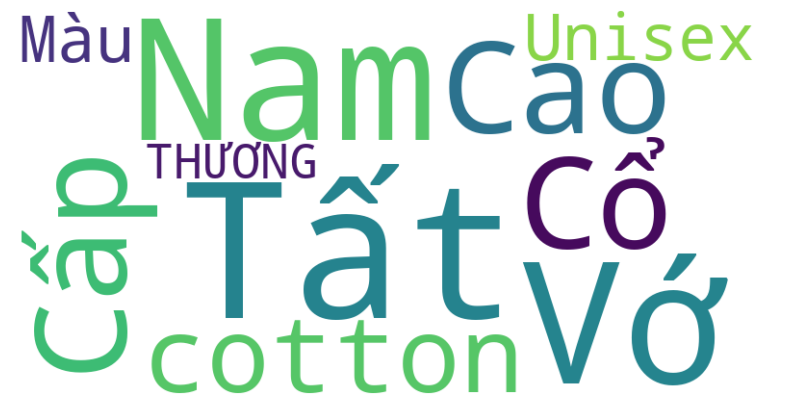

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract unique product IDs from df_score
product_ids = df_score['product_id'].unique()

# Filter the original DataFrame (containing product IDs and names)
filtered_data = data_name_product[data_name_product['product_id'].isin(product_ids)]

# Extract product names from the filtered DataFrame
product_names = filtered_data['product_name'].tolist()

# Convert the product names list to a single string
text = ' '.join(product_names)

# Generate the word cloud with only the top 10 most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=10).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()